## Customer Churn Prediction - Vodafone Corporation

### `Business Understanding`

`Introduction:` Vodafone Corporation is the largest pan-European and African telecoms company. They provide mobile and fixed services to over 300 million customers in 17 countries, partner with mobile networks in 45 more and have one of the world’s largest IoT platforms. Vodafone purpose is to connect for a better future by using technology to improve lives, businesses and help progress inclusive sustainable societies.
Vodafone Corporation faces the ubiquitous challenge of customer churn. Churn, the phenomenon where customers discontinue their services with the company, poses significant financial implications and threatens customer satisfaction. To mitigate this challenge and proactively retain valuable customers, Vodafone seeks to implement a Customer Churn Prediction system. This system aims to identify customers at risk of churning based on their behavioral patterns and characteristics, enabling targeted retention strategies.

`Goal`: The goal of this project is to develop a predictive model capable of accurately identifying customers who are likely to churn from Vodafone's services. By leveraging historical customer data encompassing demographics, usage patterns, subscription history, and churn status, the model must forecast the likelihood of churn for individual customers within a specified time frame. The predicted churn probabilities will enable Vodafone to prioritize retention efforts and deploy targeted interventions to retain at-risk customers, thereby reducing churn rates and enhancing overall customer satisfaction.

`Available Data`

`Model Usage`: The integration of the churn prediction model into Vodafone’s customer management system will result in the generation of alerts for customers at high risk. This will enable proactive actions by customer service representatives, such as providing personalized offers and launching retention campaigns.

`Approach`
 1. Data Collection and Exploration:
    -  Collect historical customer data from diverse sources.
    - Analyze the data to assess its quality, comprehensiveness, and significance.
2. Feature Engineering:
    - Develop pertinent features using the collected data.
    - Examples include churn history, customer tenure, usage patterns, and billing metrics.
3. Model Selection:
    - Select suitable machine learning algorithms (e.g., logistic regression, random forests).
    - Assess models' efficacy using performance metrics like accuracy, precision, and recall.
4. Model Training and Validation:
    - Divide the data into training and testing sets.
    - Train the model using historical data.
    - Validate the model's performance using unseen data.

`Null Hypothesis:`The duration of a customer's tenure with Vodafone exhibits a noticeable relationship with their probability of churning.

`Alternative Hypothesis:`The duration of a customer's tenure with Vodafone does not exhibits a noticeable relationship with their probability of churning.

#### Analytical Questions
1. What are the top 3 features that have strong correlation to churn?
2. How does the presence of online security, backup, and tech support affect churn?
3. What was the financial impact of customer churn on Vodafone's revenue?
4. What are the prevalent contract types and payment methods among customers exhibiting churn behavior?
5. How does the distribution of tenure differ between churned and retained customers?
6. Is there a correlation between churn and specific internet service types (e.g., fiber vs. DSL)?
7. How do different payment methods (e.g., electronic check, credit card) correlate with churn?



#### Expected Outcomes
* A predictive model capable of accurately forecasting customer churn probabilities.
* Insights into key drivers and factors influencing churn behavior within Vodafone's customer base.
* Enhanced ability to proactively identify at-risk customers and deploy targeted retention strategies to mitigate churn

## `Data Understanding`

`Import Packages`

In [2]:
# Import packages
import numpy as np
import pandas as pd
import os
from dotenv import dotenv_values, find_dotenv
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc
import warnings
import scipy as sp
from scipy import stats
import association_metrics as am

# remove display limit
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
plt.style.use('dark_background')

#sklearn and machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import * 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import *
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline

# hide warnings
warnings.filterwarnings('ignore')

print('Packages imported')


Packages imported


`Extract Datasets`

In [3]:
# Extract datasets from the database
# Load environment variables
environment_variables = dotenv_values(find_dotenv('.env'))

# Get database credentials from .env file
database = environment_variables.get('DATABASE')
server = environment_variables.get('SERVER')
username = environment_variables.get('USERNAME')
password = environment_variables.get('PASSWORD')

# Authenticate connection to the db
conn_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary
conn = pyodbc.connect(conn_string)

print('Succeeded!')

Succeeded!


In [4]:
# Extract the first dataset from the sql server - df1
query = '''
        SELECT *
        FROM dbo.LP2_Telco_churn_first_3000
        '''
df1 = pd.read_sql_query(query, conn)
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [5]:
# Load the second dataset from a github repository - df2
df2 = pd.read_csv('https://github.com/Azubi-Africa/Career_Accelerator_LP2-Classifcation/blob/main/LP2_Telco-churn-second-2000.csv?raw=true')
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,No,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [6]:
# Combine the datasets - df = df1 + df2
df = pd.concat([df1, df2], ignore_index=True)

`Exploratory Data Analysis`

In [7]:
# Display the head of the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [8]:
# Display the tail of the dataset
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
5039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
5040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
5041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
5042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [9]:
# Check the shape of the data
df.shape

(5043, 21)

In [10]:
# Print information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [11]:
# Check for unique values
df.nunique()

customerID          5043
gender                 2
SeniorCitizen          2
Partner                4
Dependents             4
tenure                73
PhoneService           4
MultipleLines          5
InternetService        3
OnlineSecurity         5
OnlineBackup           5
DeviceProtection       5
TechSupport            5
StreamingTV            5
StreamingMovies        5
Contract               3
PaperlessBilling       4
PaymentMethod          4
MonthlyCharges      2069
TotalCharges        4884
Churn                  4
dtype: int64

In [12]:
# Check for missing values
df.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [13]:
# Check the percentage of the missing data
(df.isnull().sum()/(len(df)))*100

customerID           0.000000
gender               0.000000
SeniorCitizen        0.000000
Partner              0.000000
Dependents           0.000000
tenure               0.000000
PhoneService         0.000000
MultipleLines        5.334127
InternetService      0.000000
OnlineSecurity      12.908983
OnlineBackup        12.908983
DeviceProtection    12.908983
TechSupport         12.908983
StreamingTV         12.908983
StreamingMovies     12.908983
Contract             0.000000
PaperlessBilling     0.000000
PaymentMethod        0.000000
MonthlyCharges       0.000000
TotalCharges         0.099147
Churn                0.019829
dtype: float64

In [14]:
# Check for duplicates
df.duplicated().sum()

0

#### Observations
* There are 5043 observations and 21 features after concatenating the two datasets.
* The first dataset has the True and False inputs, while the second dataset have the Yes and No inputs.
* `TotalCharges` column is of object type instaed of a float.
* Tere are the missing values as follows: 5% in the MultipleLines column, 12% in the `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `Techsupport`, `StreamingMovies`, and `StreamingTV` columns respectively. Additionally, there are missing values of 0.09% and 0.02% in the `TotalCharges` and `Churn` columns respectively.
* There are no duplicated values.
* There are some empty strings in the TotalCharges column.
#### Action
* Replace True with Yes and False with No and No internet service with No.
* Drop the missing values of `TotalCharges` and `Churn` since the percentange is small and filling them could affect our result.
* Change the `TotalCharges` to float type.
* Fill in the missing values of the other columns.
* Drop the rows with the empty strings.
* Drop the CustomerID column because it's not relevant to our analysis

In [15]:
# Replace True with Yes and False with No
bools_cols = df.columns[df.dtypes == 'object']
df[bools_cols] = df[bools_cols].replace({True: 'Yes', False: 'No'})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,None,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45,No,None,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [16]:
# Drop the missing values of TotalCharges and Churn
df = df.dropna(subset=['TotalCharges', 'Churn'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5037 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5037 non-null   object 
 1   gender            5037 non-null   object 
 2   SeniorCitizen     5037 non-null   int64  
 3   Partner           5037 non-null   object 
 4   Dependents        5037 non-null   object 
 5   tenure            5037 non-null   int64  
 6   PhoneService      5037 non-null   object 
 7   MultipleLines     4770 non-null   object 
 8   InternetService   5037 non-null   object 
 9   OnlineSecurity    4388 non-null   object 
 10  OnlineBackup      4388 non-null   object 
 11  DeviceProtection  4388 non-null   object 
 12  TechSupport       4388 non-null   object 
 13  StreamingTV       4388 non-null   object 
 14  StreamingMovies   4388 non-null   object 
 15  Contract          5037 non-null   object 
 16  PaperlessBilling  5037 non-null   object 
 17  

In [18]:
# Remove the empty strings in the TotalCharges column
df = df[df['TotalCharges'] != ' ']

In [19]:
# change TotalCharges to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5034 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5034 non-null   object 
 1   gender            5034 non-null   object 
 2   SeniorCitizen     5034 non-null   int64  
 3   Partner           5034 non-null   object 
 4   Dependents        5034 non-null   object 
 5   tenure            5034 non-null   int64  
 6   PhoneService      5034 non-null   object 
 7   MultipleLines     4767 non-null   object 
 8   InternetService   5034 non-null   object 
 9   OnlineSecurity    4385 non-null   object 
 10  OnlineBackup      4385 non-null   object 
 11  DeviceProtection  4385 non-null   object 
 12  TechSupport       4385 non-null   object 
 13  StreamingTV       4385 non-null   object 
 14  StreamingMovies   4385 non-null   object 
 15  Contract          5034 non-null   object 
 16  PaperlessBilling  5034 non-null   object 
 17  

In [20]:
df.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       267
InternetService       0
OnlineSecurity      649
OnlineBackup        649
DeviceProtection    649
TechSupport         649
StreamingTV         649
StreamingMovies     649
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          0
Churn                 0
dtype: int64

In [21]:
# Filling in missing values - OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies.
# Define a function to fill missing values
def fill_missing(row):
    if row['InternetService'] == 'No':
        return 'No internet service'
    else:
        return 'No' if pd.isnull(row['OnlineSecurity']) else 'Yes'
# Apply function to each row
df['OnlineSecurity'] = df.apply(fill_missing, axis=1)
df['OnlineBackup'] = df.apply(fill_missing, axis=1)
df['DeviceProtection'] = df.apply(fill_missing, axis=1)
df['TechSupport'] = df.apply(fill_missing, axis=1)
df['StreamingTV'] = df.apply(fill_missing, axis=1)
df['StreamingMovies'] = df.apply(fill_missing, axis=1)

In [22]:
# Filling in the missing values of MutipleLines
df['MultipleLines'] = df.apply(lambda row: 'No phone service' if row['PhoneService'] == 'No' and pd.isnull(row['MultipleLines']) else row['MultipleLines'], axis=1)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [23]:
# Descriptive Statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5034.000000,5034.000000,5034.000000,5034.000000
mean,0.162694,32.620580,65.107251,2300.954758
std,0.369123,24.511015,30.068019,2268.346402
min,0.000000,1.000000,18.400000,18.799999
25%,0.000000,9.000000,35.799999,417.662498
50%,0.000000,29.000000,70.599998,1401.000000
75%,0.000000,56.000000,90.050003,3860.599976
max,1.000000,72.000000,118.650002,8670.100000


In [24]:
# Descriptive statistics with including the categorical columns
df.describe(include=['O'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,5034,5034,5034,5034,5034,5034,5034,5034,5034,5034,5034,5034,5034,5034,5034,5034,5034
unique,5034,2,2,2,2,3,3,2,2,2,2,2,2,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,No
freq,1,2554,2583,3481,4547,2421,2247,3957,3957,3957,3957,3957,3957,2744,2992,1699,3698


`Insights:`

From the above descriptive stats we can extract the following;
* Approximately 16.27% of the observations in the dataset are senior citizens. The standard deviation shows the variability in this proportion across the dataset.
* On average, customers have been with the service for around 32.62 months. The standard deviation indicates considerable variability in tenure among customers, with some having short tenures and others much longer.
* The average monthly charge for customers is $65.11. The standard deviation indicates the variability in monthly charges among customers, suggesting that there might be different pricing plans or factors influencing charges.
* The average total charges incurred by customers are $2300.95. The large standard deviation suggests significant variability in the total charges, indicating differences in usage patterns or billing arrangements among customers. The mean is larger than the median, suggesting a potential right skew (positive skewness).

`Univariate Analysis`

Seperate numerical and categorical columns for easy analysis

In [25]:
# Seperate numerical and categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

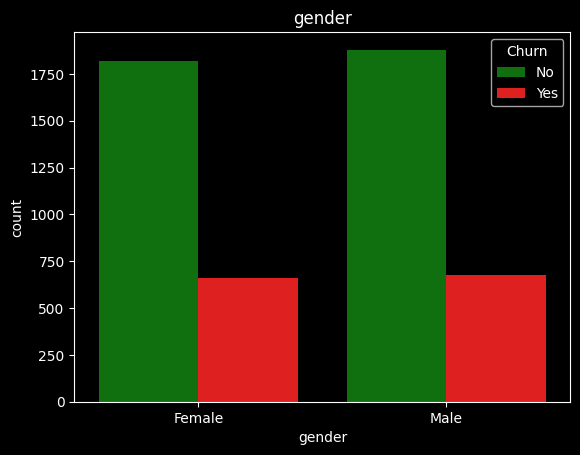

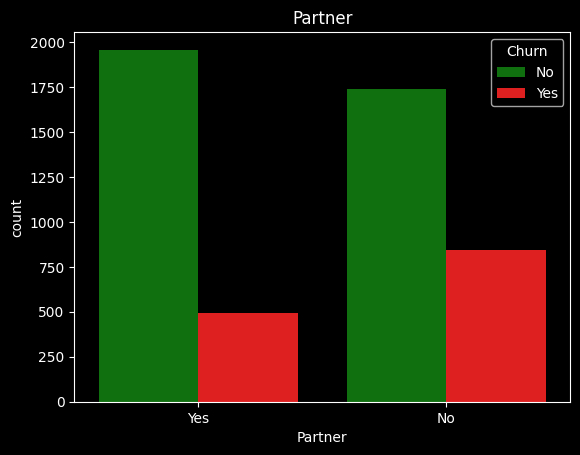

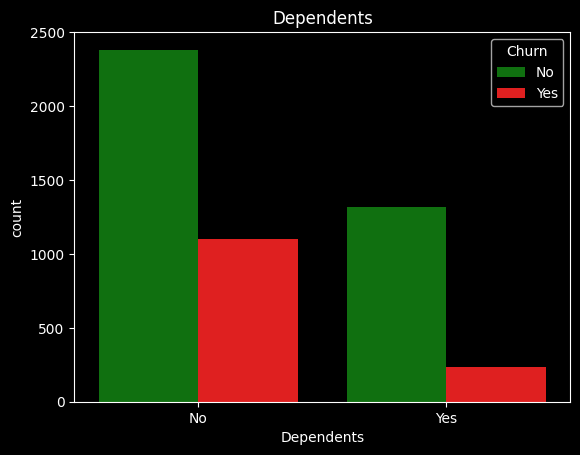

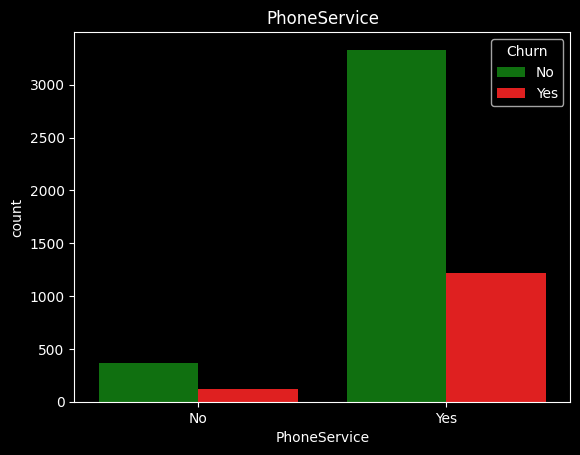

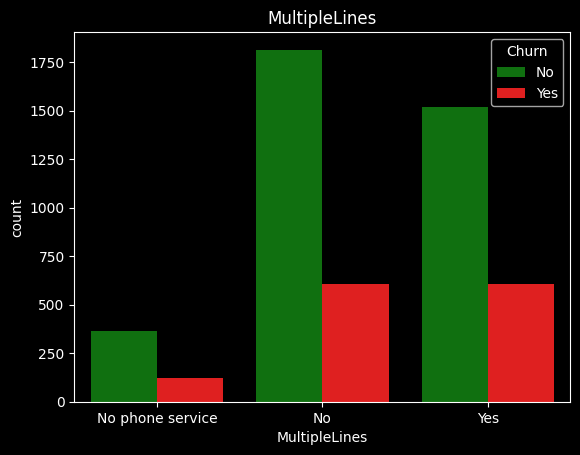

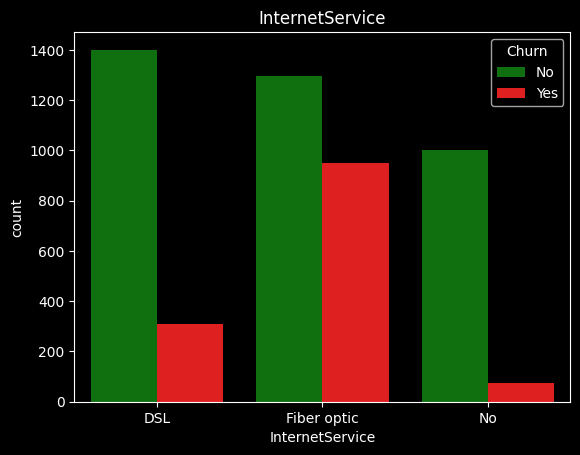

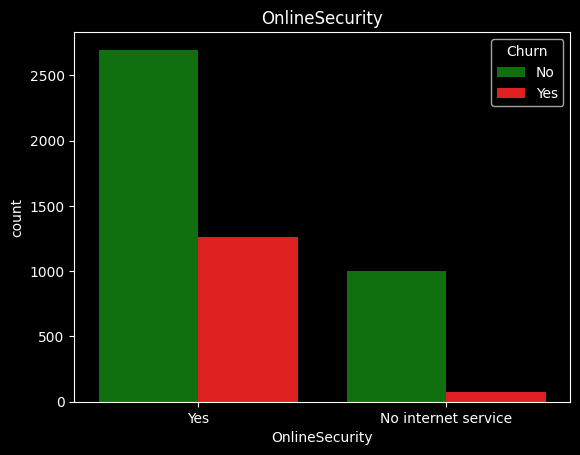

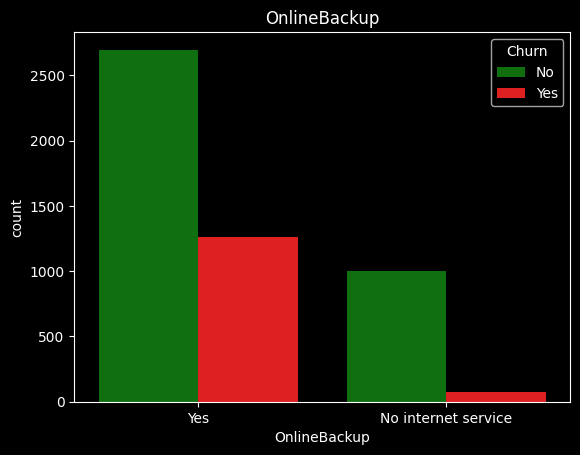

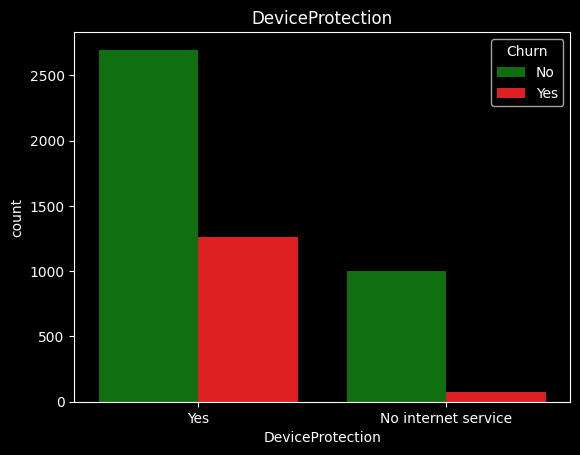

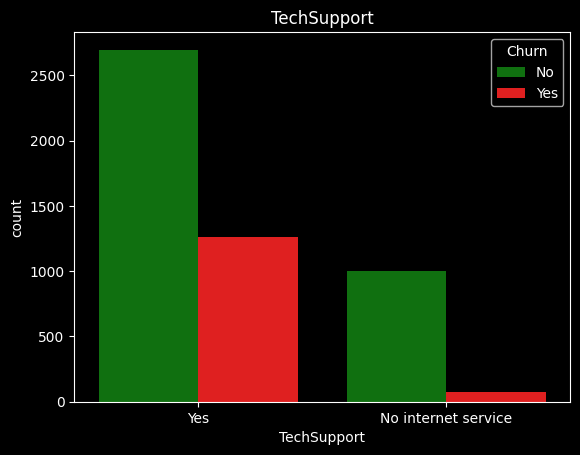

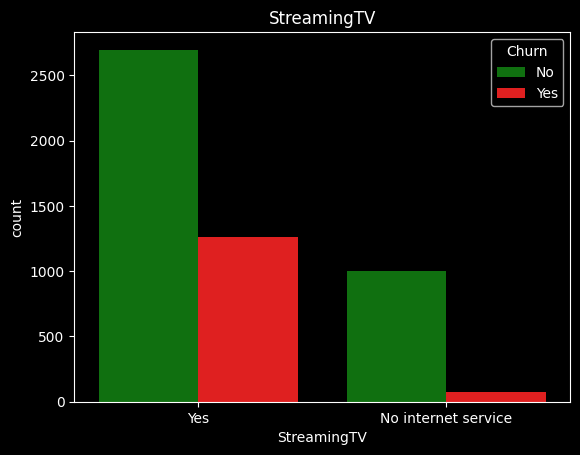

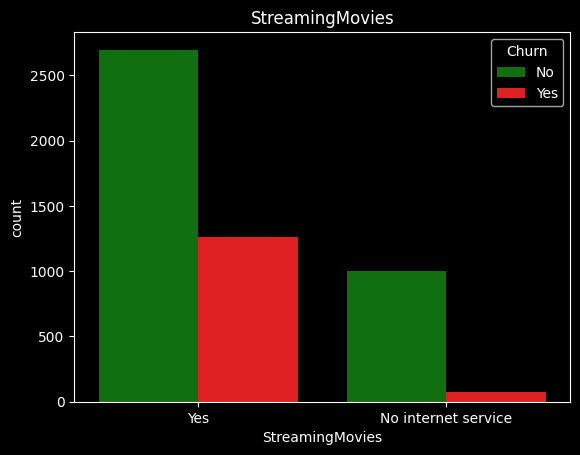

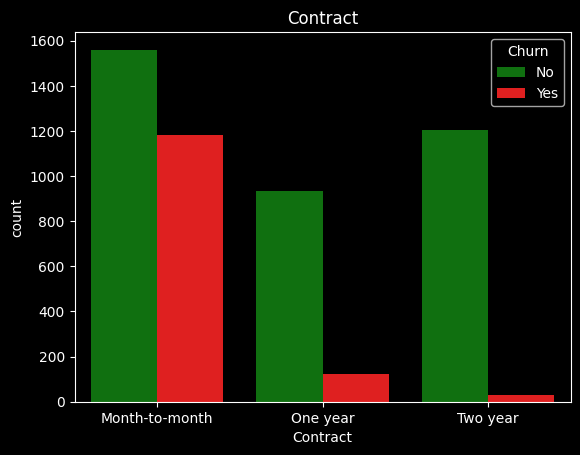

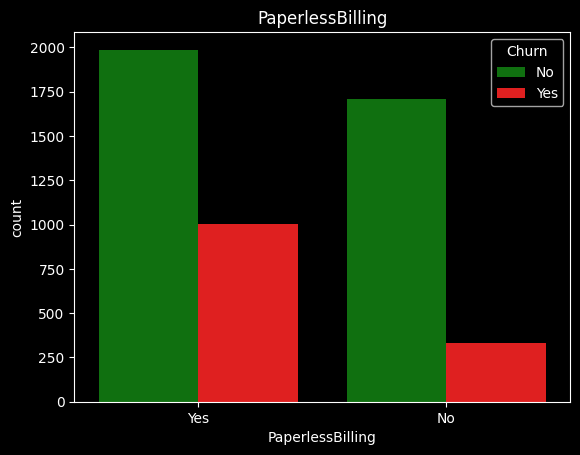

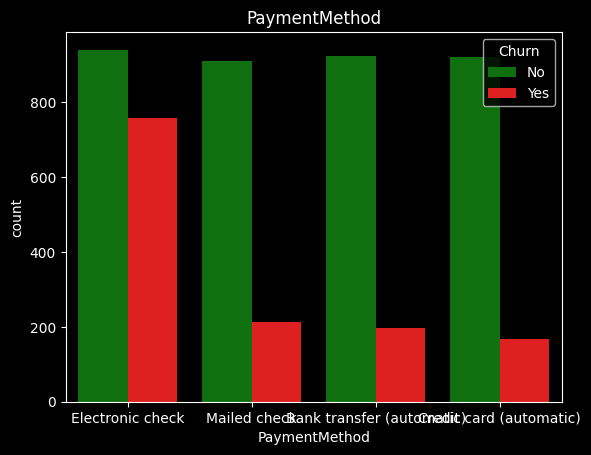

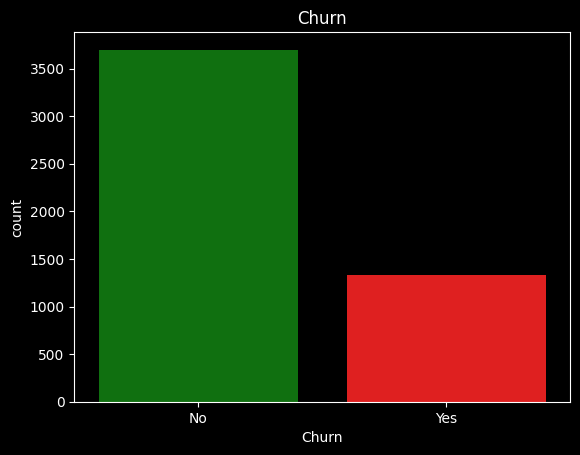

In [26]:
# Display countplot for all the categorical columns
colors = ['green', 'red']
for col in cat_cols:
    if col not in ['customerID']:
        sns.countplot(x=col, data=df, hue='Churn', palette=colors).set_title(col)
        plt.show()

In [27]:
df.Churn.value_counts()

Churn
No     3698
Yes    1336
Name: count, dtype: int64


* The visualization clearly indicates that 3698 customers have chosen to continue their service, while 1869 customers have decided to terminate their subscription.
* Notably, there appears to be a considerable churn rate among customers utilizing the electronic check payment method.
* Customers who opted for paperless billing exhibit a higher churn rate compared to other billing methods.
* The month-to-month contract type demonstrates a notably elevated churn rate among customers.
* A substantial proportion of customers who subscribed to the Fiber internet service exhibit churn behavior.

tenure
Skew : 0.22


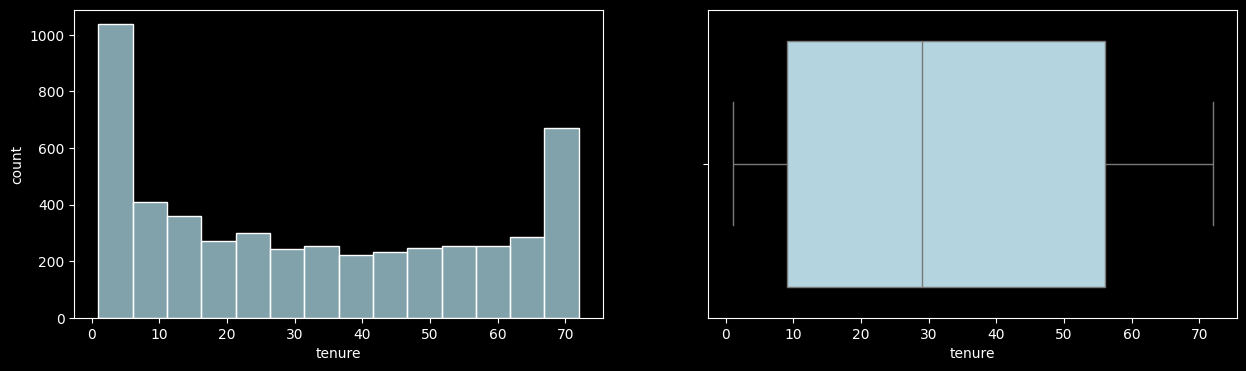

MonthlyCharges
Skew : -0.24


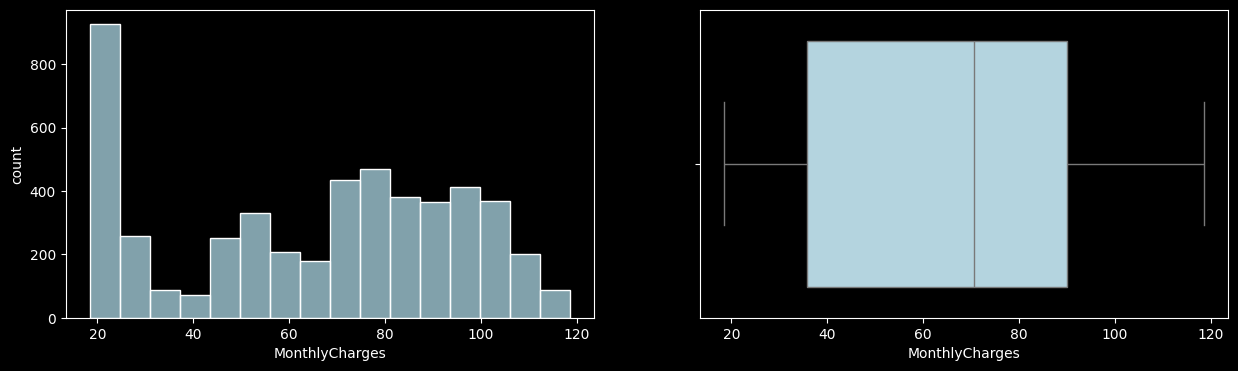

TotalCharges
Skew : 0.94


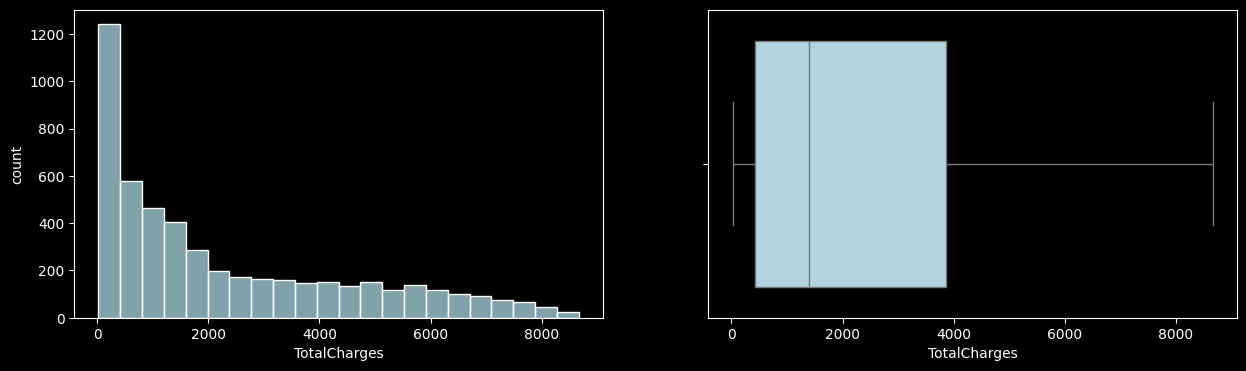

In [28]:
# Display histogram and boxplot for all the numerical columns
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(x= df[col], color='lightblue')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='lightblue')
    plt.show()

`Bivariate Analysis`

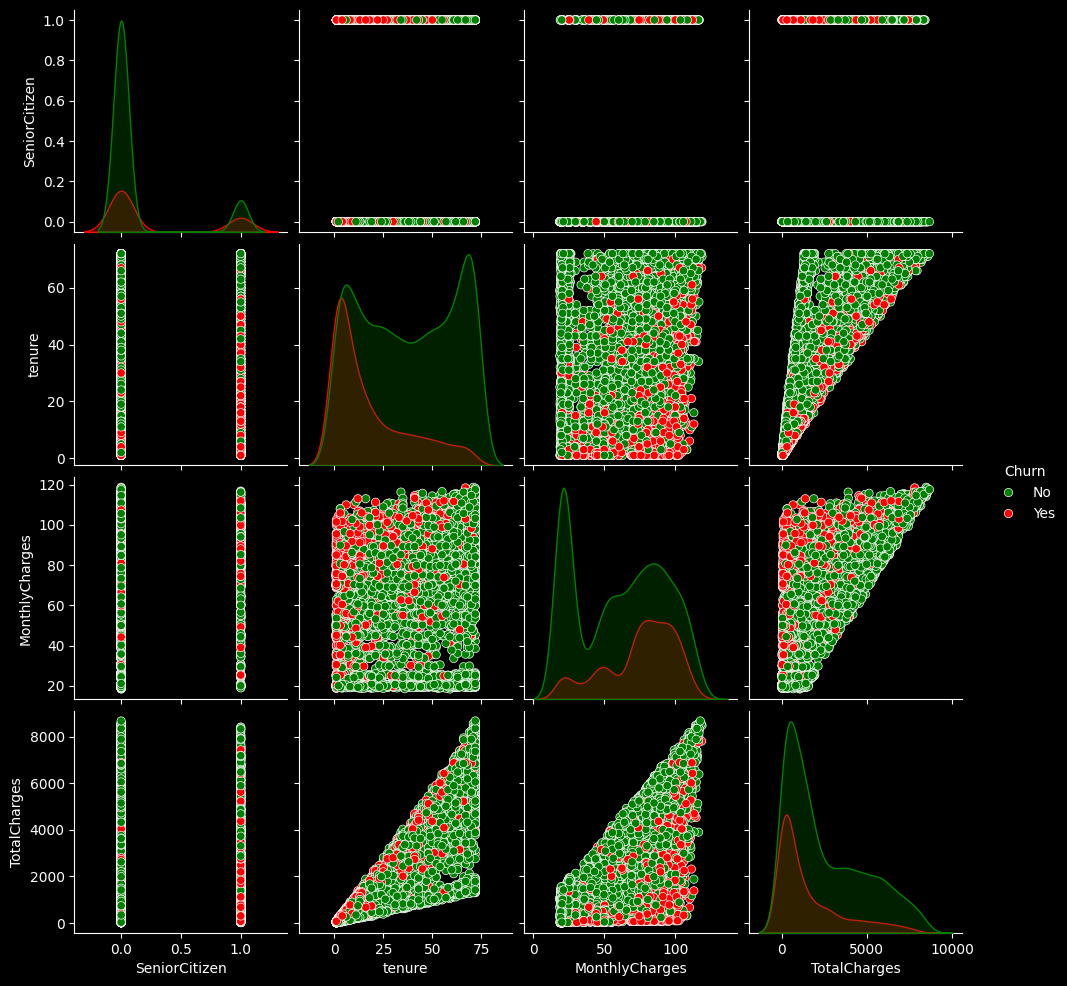

In [29]:
sns.pairplot(df, hue='Churn', palette=colors);

The Pairplot provides the insight below;
* `TotalCharges` has strong correlation with `tenure` and `MonthlyCharges`.
* `MonthlyCharges` has slight correlation with `tenure`.

`Multivariate Analysis`

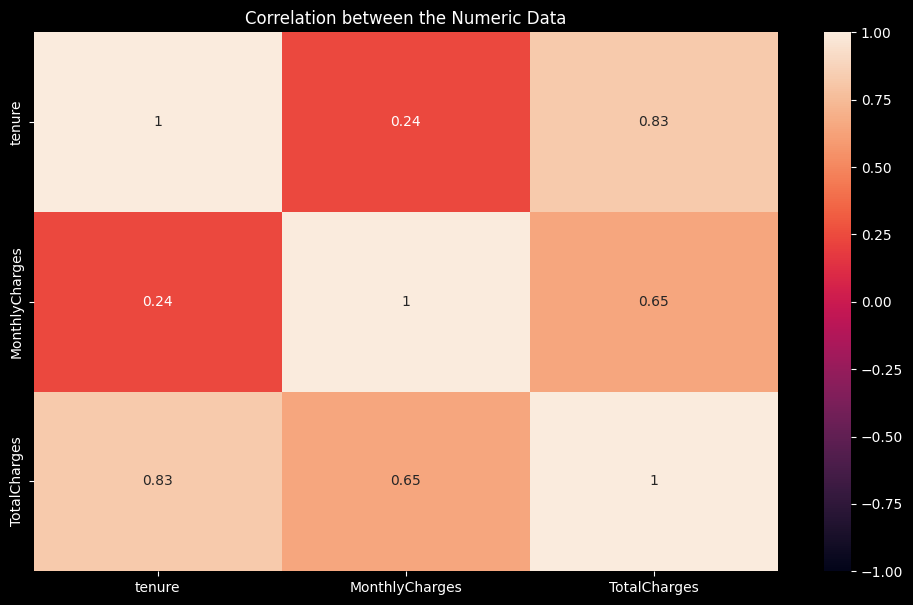

In [30]:
plt.figure(figsize=(12, 7))
plt.title('Correlation between the Numeric Data')
sns.heatmap(data=df[num_cols].corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

The heatmap provides the insight below;
* `TotalCharges` has strong correlation with `tenure`.
* There is a decent correlation between `TotalCharges` and `MonthlyCharges`
* `MonthlyCharges` has little correlation with `tenure`.



`Answering the Analytical Questions`

*Question 1 -* What are the top 3 features that have strong correlation to churn?

In [31]:
# Mapping Churn Values to numeric
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df.drop('customerID', axis=1, inplace=True)

In [32]:
#  Make dummy variables for all categorical
dfd = pd.get_dummies(df)
dfd.tail()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5038,0,24,84.80,1990.50,0,False,True,False,True,False,True,False,True,False,False,True,True,False,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,False,False,False,True
5039,0,72,103.20,7362.90,0,True,False,False,True,False,True,False,True,False,False,True,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,False,True,False,False
5040,0,11,29.60,346.45,0,True,False,False,True,False,True,True,False,False,True,False,True,False,False,False,True,False,True,False,True,False,True,False,True,False,True,True,False,False,False,True,False,False,True,False
5041,1,4,74.40,306.60,1,False,True,False,True,True,False,False,True,False,False,True,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,True,False,False,False,True,False,False,False,True
5042,0,66,105.65,6844.50,0,False,True,True,False,True,False,False,True,True,False,False,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,False,True,True,False,False,False


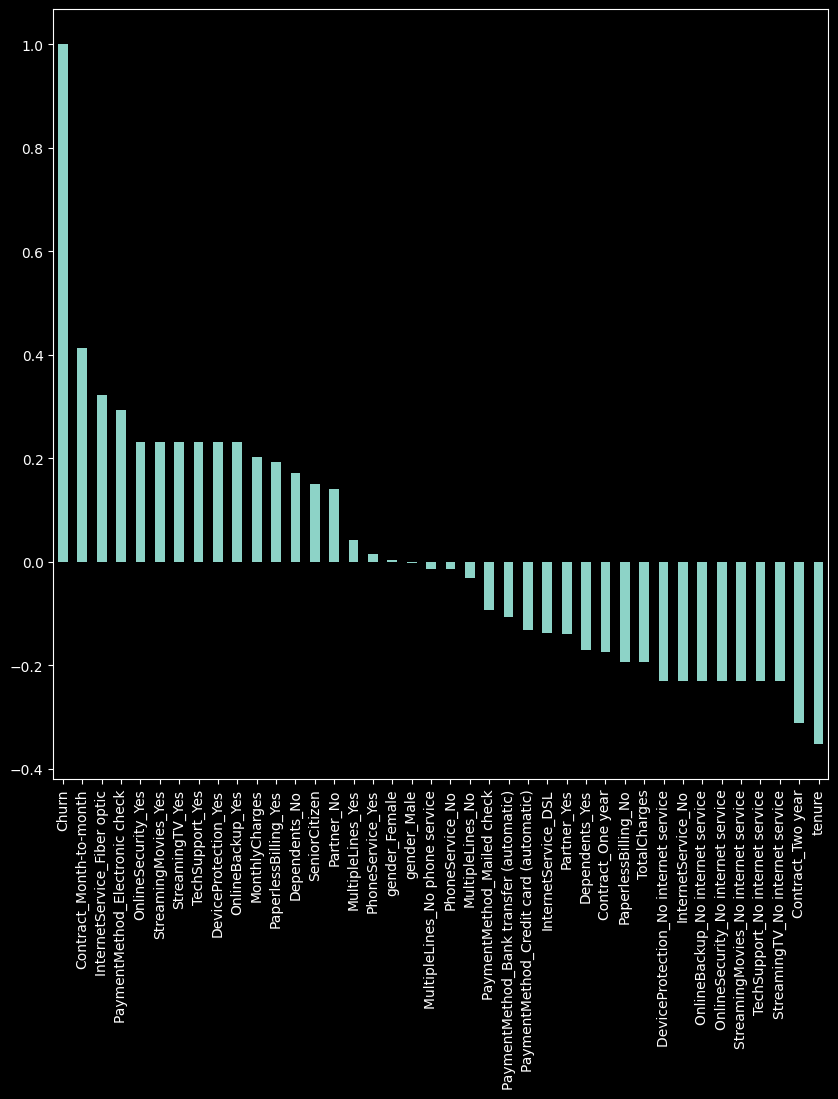

In [33]:
# Correlation plot
plt.figure(figsize=(10, 10))
dfd.corr()['Churn'].sort_values(ascending=False).plot(kind='bar');

After calculating the correlation coefficients between the 'churn' variable and all other features in the dataset, we found that the following features exhibit the strongest correlations with churn:

* `Contract` (correlation coefficient: 0.411764)
* `InternetService` (correlation coefficient: 0.320970)
* `PaymentMethod` (correlation coefficient: 0.292181)

These top 3 features show the highest correlation with churn, indicating that they may play a significant role in predicting or influencing customer churn behavior.

**Question 2 -** How does the presence of online security, backup, and tech support affect churn?

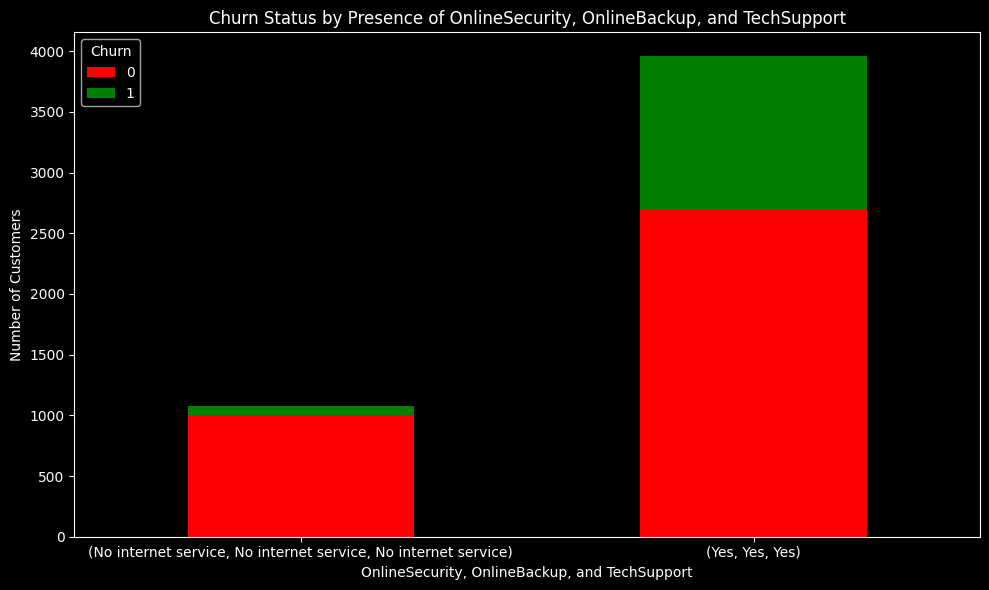

In [34]:
# count of churners and non-churners for each combination of features

churn_counts = df.groupby(['OnlineSecurity', 'OnlineBackup', 'TechSupport', 'Churn']).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(10, 6))
churn_counts.plot(kind='bar', stacked=True, color=['red', 'green'], ax=plt.gca())
plt.title('Churn Status by Presence of OnlineSecurity, OnlineBackup, and TechSupport')
plt.xlabel('OnlineSecurity, OnlineBackup, and TechSupport')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Among customers who do not have online security, online backup, and tech support, the churn rate is higher compared to customers who have these services. Approximately 47.6% of customers without these services churned, while only 40.3% of customers with these services churned.
This suggests that the presence of online security, online backup, and tech support may have a beneficial effect on reducing churn. Customers who have access to these services are less likely to churn compared to those who do not have these services.
Therefore, the business may consider investing in or improving online security, online backup, and tech support services as part of their churn reduction strategy. Providing these services could potentially increase customer satisfaction and loyalty, leading to lower churn rates and higher retention of customers.

**Question 3 -** What was the financial impact of customer churn on Vodafone's revenue?

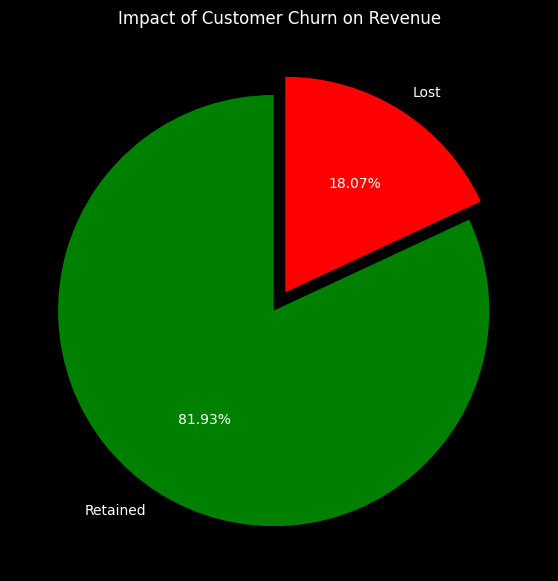

In [35]:
#Comparing revenue for churned and retained customers
retained_revenue = (df['TotalCharges'].where(df['Churn']== 0).sum())

lost_revenue = (df['TotalCharges'].where(df['Churn'] == 1).sum())

churnimpact=[retained_revenue, lost_revenue]
churnimpact
plt.figure(figsize=(7,7))
plt.pie(colors=['green','red'], startangle=90, x=churnimpact, explode=[0.05,0.05], autopct='%2.2f%%', labels=['Retained','Lost'])
plt.title(f'Impact of Customer Churn on Revenue')
plt.show()


Customer Churn results in a loss of USD 2,092,874.25 in Revenue for the company

**Question 4 -** What are the prevalent contract types and payment methods among customers exhibiting churn behavior?

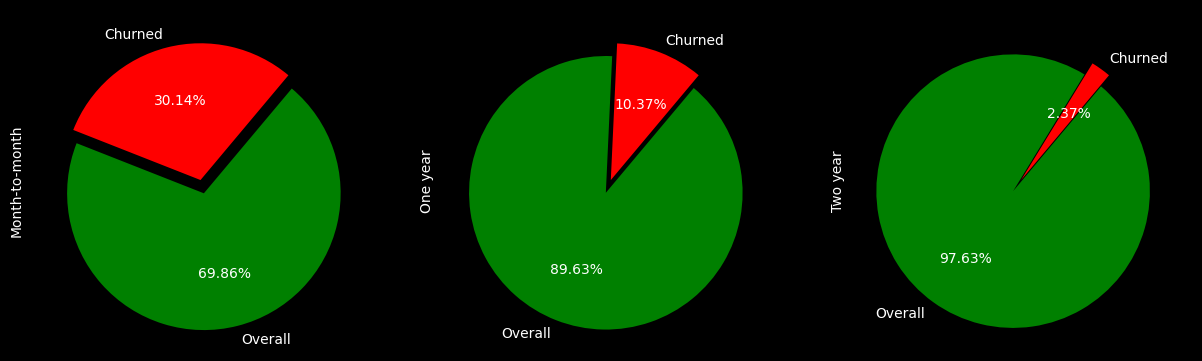

In [36]:
contract_churn = df['Contract'].where(df['Churn'] ==1).value_counts()

data = pd.DataFrame({'Churned':contract_churn, 'Overall':df['Contract'].value_counts()}).T
for i,col in enumerate(data):
    plt.subplot(1,3,i+1)
    data[col].plot(kind='pie', autopct = '%2.2f%%', explode=[0,0.1], startangle=50, figsize=(15,10), colors=['red','green'])

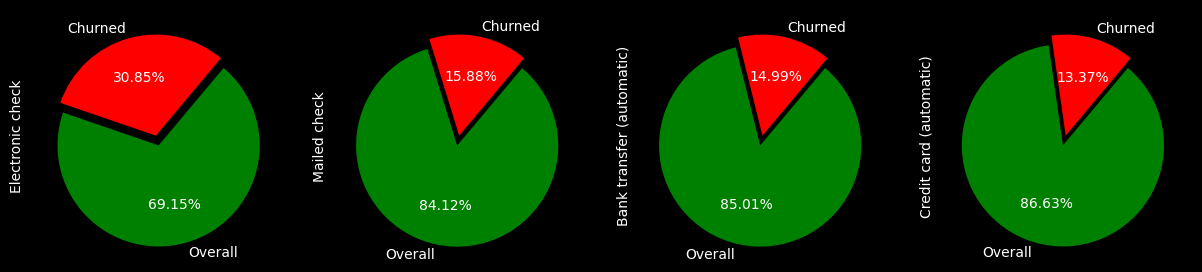

In [37]:
payment_churn = df['PaymentMethod'].where(df['Churn'] ==1).value_counts()

data = pd.DataFrame({'Churned':payment_churn, 'Overall':df['PaymentMethod'].value_counts()}).T
for i,col in enumerate(data):
    plt.subplot(1,4,i+1)
    data[col].plot(kind='pie', autopct = '%2.2f%%', explode=[0,0.1], startangle=50, figsize=(15,10), colors=['red','green'])

- The Month to month contract is the most prevalent contract type with 30.14% of the customers having churned.
- The Electronic check method is the most prevalent PaymentMethod type with 30.85% of the customers having churned.


**Question 5 -** How does the distribution of tenure differ between churned and retained customers?

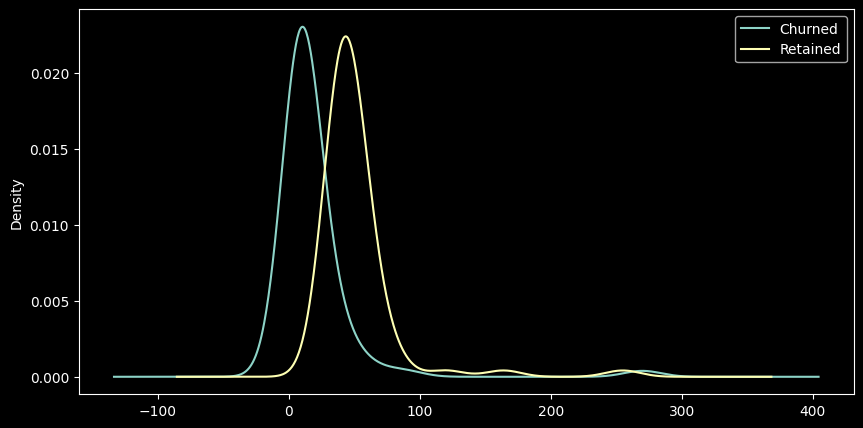

In [38]:
#checking distribution of tenure for retained and churned customers
churned_tenure = (df['tenure'].where(df['Churn'] == 1).value_counts())

retained_tenure = (df['tenure'].where(df['Churn'] == 0).value_counts())

data = pd.DataFrame({'Churned':churned_tenure,'Retained':retained_tenure})

data.plot(kind='kde', figsize=(10,5));

`Hypothesis Testing`

In [39]:
# Creating contingency table
contingency_table = pd.crosstab(df['tenure'], df['Churn'])
# print("Contingency Table:")
# print(contingency_table)

# Chi-Square Test
observed = contingency_table.values
chi2, p, dof, expected = stats.chi2_contingency(observed)
# print("\nExpected Frequencies:")
# print(expected)

print("\nChi-Square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)

# Interpretation
alpha = 0.05
print("\nSignificance Level (alpha):", alpha)
if p < alpha:
    print("Reject Null Hypothesis: There is a significant relationship between tenure and churn.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant relationship between tenure and churn.")


Chi-Square Statistic: 770.5091937872105
Degrees of Freedom: 71
P-value: 4.946868601533245e-118

Significance Level (alpha): 0.05
Reject Null Hypothesis: There is a significant relationship between tenure and churn.


It is evident from the above that `the duration of a customer's tenure with Vodafone does not exhibits a noticeable relationship with their probability of churning.`

## `Data Preprocessing`

In [40]:
#Splitting data
#Use Stratified Test Split
X = df.drop(columns= ['Churn'])
y = df['Churn']
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [41]:
# Encoding target variable
encoder = LabelEncoder()

#fitting y_train and y_eval
y_train_encoded = encoder.fit_transform(y_train)
y_eval_encoded = encoder.transform(y_eval)

In [42]:
#Checking Dtypes
X.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [43]:
#List of numeric Columns
numerical = X.select_dtypes('number').columns
categoric = X.select_dtypes('category').columns


`Pipeline Build`

In [44]:
# Set up the transformers
# For the numeric variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")), # handlie missing values
                                      ("scaler", MinMaxScaler()) # scale numerics
                                     ]
                              )
# For the categorical variables
categorical_transformer = Pipeline(steps=[("encoder", OneHotEncoder(sparse_output=False)),
                                       ("imputer", SimpleImputer(strategy="most_frequent"))
                                      ]
                               )
# Set up the final preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[("numeric", numeric_transformer, numerical),
                                                     ("categorical", categorical_transformer, categoric)
                                                    ]
                                      )
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', MinMaxScaler())]),
                                 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(sparse_output=False)),
                                                 ('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 Index([], dtype='object'))])

In [45]:
#Checking if data is balanced
y_train.value_counts()

Churn
0    2958
1    1069
Name: count, dtype: int64

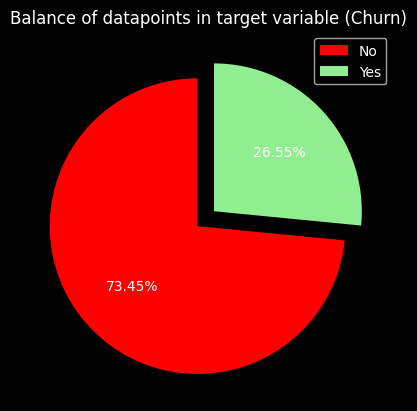

In [46]:
#checking data balance
plt.pie(x=y_train.value_counts(),autopct='%2.2f%%', colors=['red','lightgreen'], startangle=90, explode=[0.1,0.05])
plt.title('Balance of datapoints in target variable (Churn)')
plt.legend(labels=['No','Yes'])
plt.show()

`Observation`

The data exhibits a significant imbalance, with a ratio of 73.45% for "No" and 26.55% for "Yes."


`Action`

We'll initially train on an unbalanced dataset and subsequently assess performance by comparing it with a balanced dataset.



## `Model and Evaluation`

In [47]:
#Building Model List
models = [('RandomForest', RandomForestClassifier(random_state=42)), 
          ('LogisticRegression',LogisticRegression(random_state=42)),
          ('AdaBoost',AdaBoostClassifier(random_state=42, n_estimators=67)),
          ('XGB', XGBClassifier(random_state = 42, verbose = False, n_jobs = -1)),
          ('DecisionTree', DecisionTreeClassifier(random_state= 42)),
          ('KNN',KNeighborsClassifier(n_neighbors=7))
          ]

`Training and Evaluation of Unbalanced Data`

In [48]:
#create a dictionary to host all the trained models
all_pipelines = {}

#Create a dataframe of the evaluation metrics
metrics_df = pd.DataFrame(columns=['model','precision','recall','f1_score'])

#Create a dataframe for confusion matrices
confusion_df = pd.DataFrame(columns=['model','matrix'])

#loop over models in model list
for model_name,classifier in models:
    #create final pipeline for training
    final_pipeline = Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('classifier',classifier)
    ])
    
    #fitting data to pipeline
    final_pipeline.fit(X_train,y_train_encoded)
    
    #adding to dictionary
    all_pipelines[model_name] = final_pipeline
    
    #perform prediction
    y_pred = final_pipeline.predict(X_eval)
    
    #calculate evaluation metrics
    metrics = classification_report(y_eval_encoded,y_pred, output_dict=True,)
    
    #define the columns to add to the table
    model = model_name
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score = metrics['weighted avg']['f1-score']
    
    #append evaluation metrics to dataframe
    metrics_df.loc[len(metrics_df)] = [model,precision,recall,f1_score]
    
    #plot the confusion matrix
    pipeline_conf_dict = {}
    
    # Define the Confusion Matrix
    model_conf_mat = confusion_matrix(y_eval_encoded, y_pred)
    
    #append confusion matrix to dictionary
    pipeline_conf_dict[model_name] = pd.DataFrame(model_conf_mat)
    
    #append to confusion dataframe
    confusion_df.loc[len(confusion_df)] = [model_name,pd.DataFrame(model_conf_mat)]
     
#set index   
confusion_df = confusion_df.set_index('model')

metrics_df.sort_values('f1_score', ascending=False)

,model,precision,recall,f1_score
2,AdaBoost,0.788570,0.800397,0.788903
1,LogisticRegression,0.778984,0.791460,0.780825
5,KNN,0.754692,0.764647,0.758397
0,RandomForest,0.743525,0.755710,0.747878
3,XGB,0.744103,0.752731,0.747648
4,DecisionTree,0.697391,0.698113,0.697749


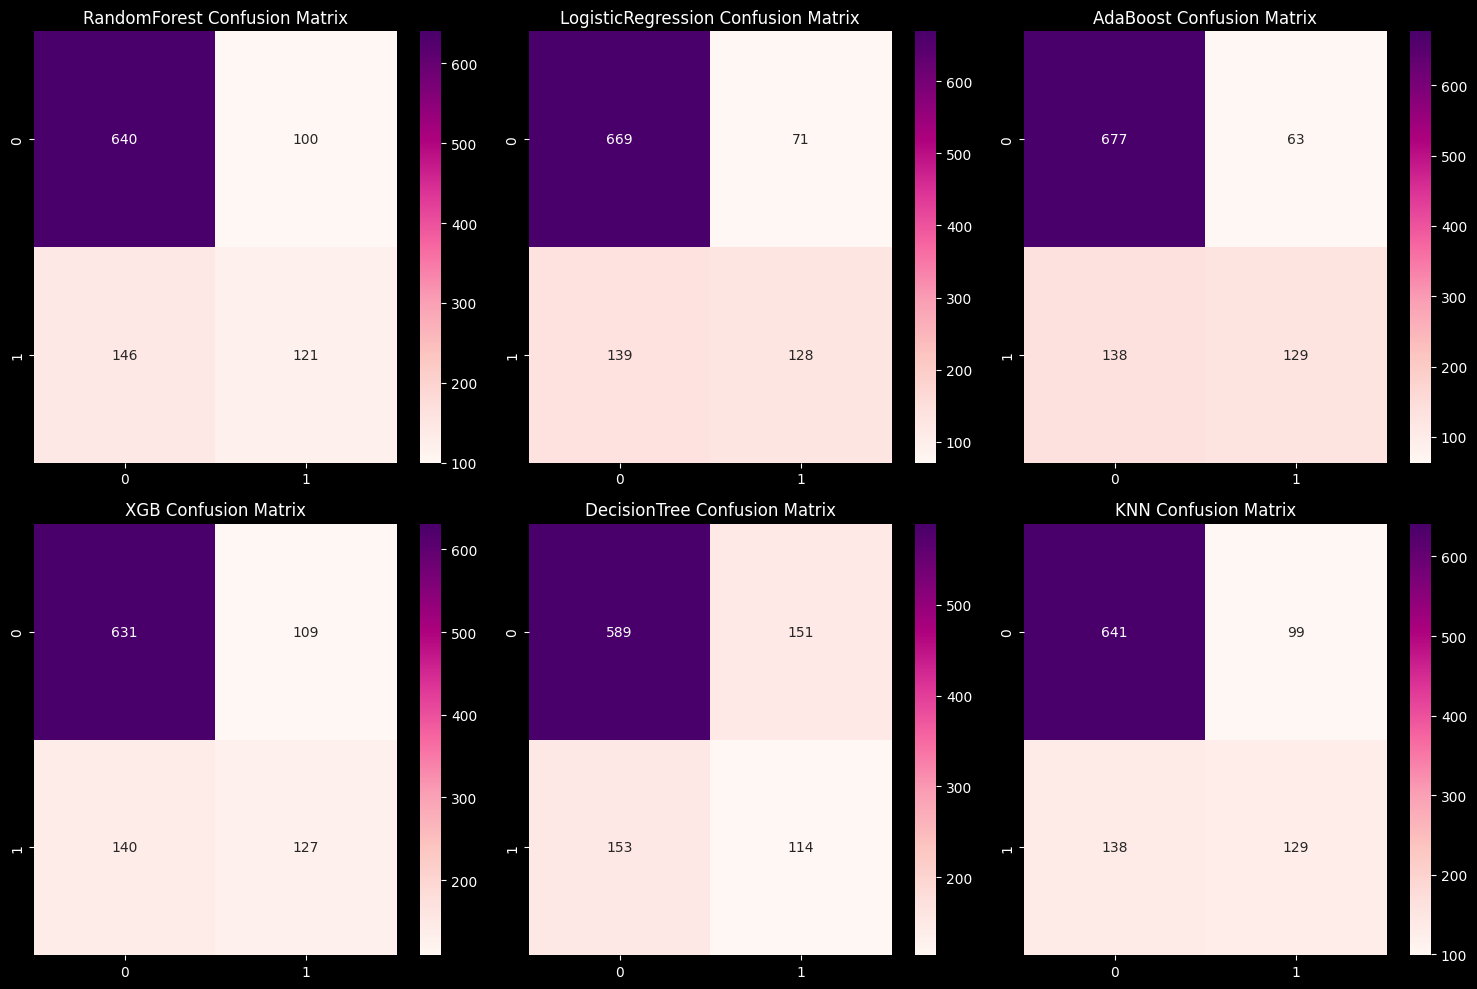

In [56]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Loop through trained models to plot confusion matrix
for i, (model, matrix) in enumerate(zip(metrics_df['model'], confusion_df['matrix'])):
    sns.heatmap(matrix, annot=True, cmap='RdPu', fmt='2.0f', ax=axs[i//3, i%3])
    axs[i//3, i%3].set_title(f'{model} Confusion Matrix')

plt.tight_layout()
plt.show()

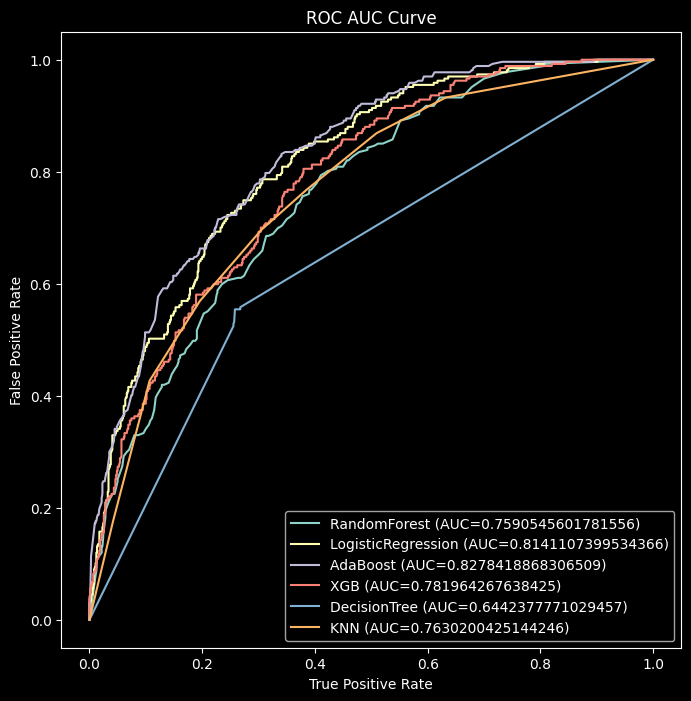

In [58]:
# Create a dictionary for the ROC AUC scores
roc_auc_df = {}

fig, ax = plt.subplots(figsize=(8, 8))

for model, pipeline in all_pipelines.items():
    # Calculate prediction probabilities for the ROC AUC curve
    y_score = pipeline.predict_proba(X_eval)[:, 1]

    # Calculate ROC AUC
    fpr, tpr, threshold = roc_curve(y_eval_encoded, y_score)
    auc_score = auc(fpr, tpr)

    # Create a DataFrame for ROC AUC data
    roc_auc_dict = pd.DataFrame({'FalsePositiveRate': fpr, 'TruePositiveRate': tpr, 'Threshold': threshold})
    
    # Append DataFrame to dictionary
    roc_auc_df[model] = roc_auc_dict
    
    # Plot ROC AUC curve
    ax.plot(fpr, tpr, label=f'{model} (AUC={auc_score})')
    
ax.set_xlabel('True Positive Rate')
ax.set_ylabel('False Positive Rate')

plt.legend(loc='lower right')
plt.title('ROC AUC Curve')
plt.show()

Training on Balanced Dataset

In [57]:
#create a dictionary to host all the trained models
all_balanced_pipelines = {}

#Create a dataframe of the evaluation metrics
balanced_metrics_df = pd.DataFrame(columns=['model','precision','recall','f1_score'])

#Create a dataframe for confusion matrices
balanced_confusion_df = pd.DataFrame(columns=['model','matrix'])

#loop over models in model list
for model_name,classifier in models:
    #create final pipeline for training
    balanced_pipeline = imbPipeline(steps=[
        ('preprocessor',preprocessor),
        ('smote_sampler',SMOTE(random_state=420)),
        ('classifier',classifier)
    ])
    
    #fitting data to pipeline
    balanced_pipeline.fit(X_train,y_train_encoded)
    
    #adding to dictionary
    all_balanced_pipelines[model_name] = balanced_pipeline
    
    #perform prediction
    y_pred = balanced_pipeline.predict(X_eval)
    
    #calculate evaluation metrics
    balanced_metrics = classification_report(y_eval_encoded,y_pred, output_dict=True,)
    
    #define the columns to add to the table
    model = model_name
    precision = balanced_metrics['weighted avg']['precision']
    recall = balanced_metrics['weighted avg']['recall']
    f1_score = balanced_metrics['weighted avg']['f1-score']

     #append evaluation metrics to dataframe
    balanced_metrics_df.loc[len(balanced_metrics_df)] = [model,precision,recall,f1_score]
    
    #plot the confusion matrix
    balanced_pipeline_conf_dict = {}
    
    # Define the Confusion Matrix
    balanced_model_conf_mat = confusion_matrix(y_eval_encoded, y_pred)
    
    #append confusion matrix to dictionary
    balanced_pipeline_conf_dict[model_name] = pd.DataFrame(balanced_model_conf_mat)
    
    #append to confusion dataframe
    balanced_confusion_df.loc[len(balanced_confusion_df)] = [model_name,pd.DataFrame(balanced_model_conf_mat)]
     
#balanced_metrics_df
#set index   
balanced_confusion_df = balanced_confusion_df.set_index('model')

balanced_metrics_df.sort_values('f1_score', ascending=False)

,model,precision,recall,f1_score
1,LogisticRegression,0.783971,0.733863,0.747102
2,AdaBoost,0.786655,0.724926,0.739698
0,RandomForest,0.742336,0.722939,0.730528
3,XGB,0.746147,0.711023,0.722766
5,KNN,0.754518,0.695134,0.711130
4,DecisionTree,0.712177,0.687190,0.696977


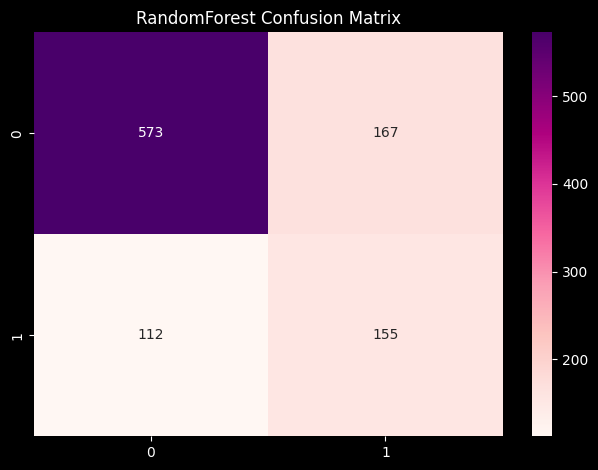

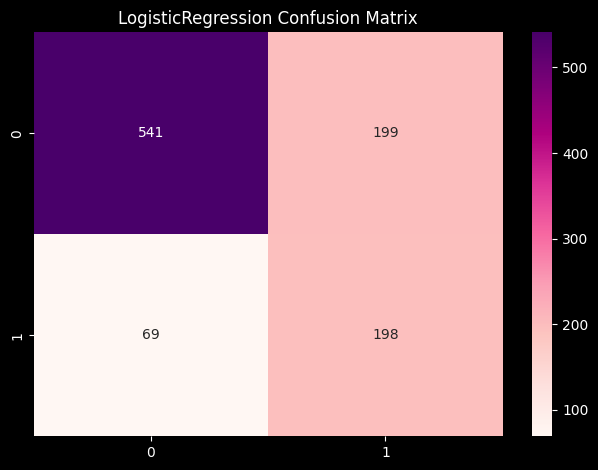

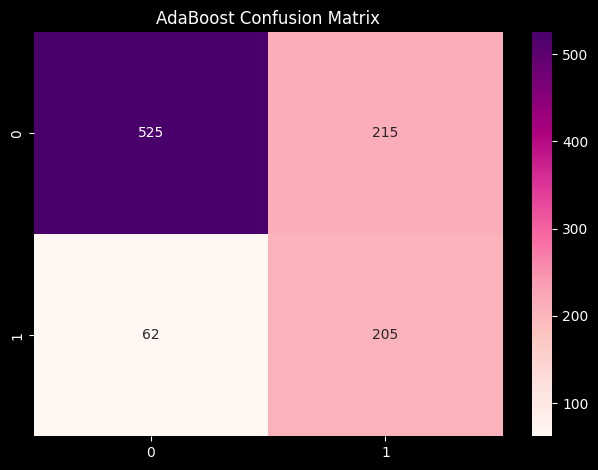

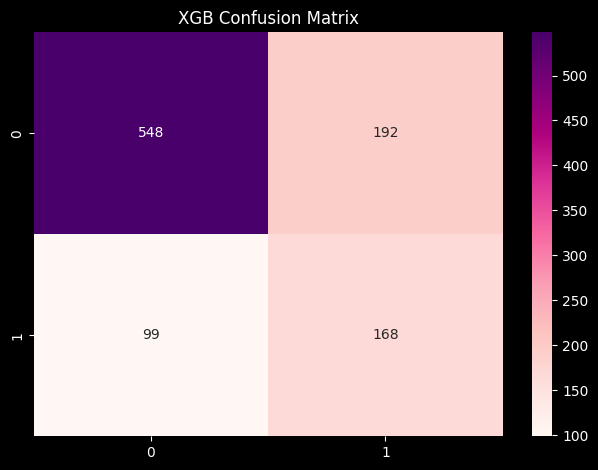

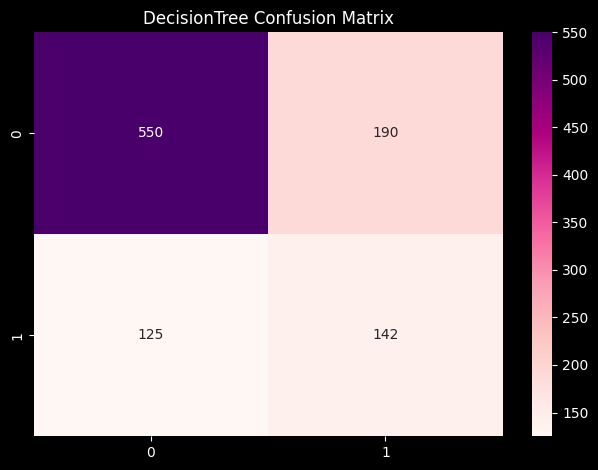

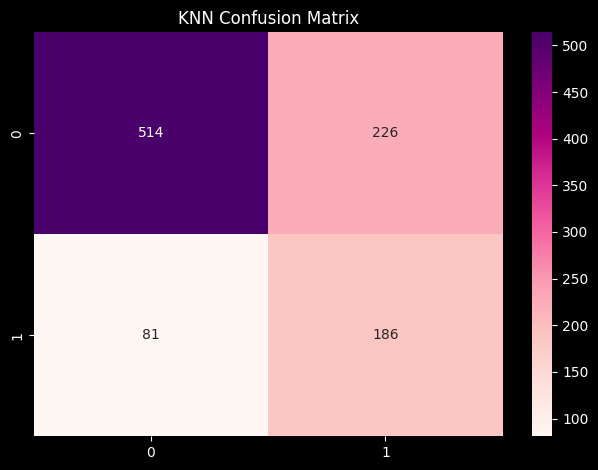

In [51]:
#Loop through trained models to plot confusion matrix
for i, model in enumerate(balanced_metrics_df['model']):
    sns.heatmap(balanced_confusion_df['matrix'][model], annot=True, cmap='RdPu', fmt='2.0f')
    plt.title(f'{model} Confusion Matrix')
    plt.tight_layout()
    plt.show()

- The models excel in achieving true positives when the dataset is balanced compared to when it's imbalanced.
- Logistic Regression and KNN stand out as the top performers in this aspect